## Twitter Sentiment Analysis

In [1]:
# Importing the libraries
import tweepy
import re
import pickle

from tweepy import OAuthHandler

In [2]:
#Please change with your own consumer key, consumer secret, access token and access secret
# Initializing the keys
consumer_key = ''
consumer_secret = '' 
access_token = ''
access_secret =''

In [4]:
# getting access from twitter
auth = OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)

In [6]:
args = ['whatsapp'] # search token
api = tweepy.API(auth, timeout=10)

In [7]:
# Fetching the 100 tweets
list_tweets = []

query = args[0]
for search_token in args:
    for status in tweepy.Cursor(api.search,q=search_token+" -filter:retweets",lang='en',result_type='recent',geocode="22.1568,89.4332,500km").items(100):
        list_tweets.append(status.text)

In [24]:
# loading the model and vectorizer which i trained on reviews dataset
# the complete code of this model also available in my text_classication repository
with open("./models/model.pickle", 'rb') as f:
    classifier = pickle.load(f)
with open("./models/vectorizer.pickle", 'rb') as f:
    tfidf_vectorizer = pickle.load(f)
    
label_map = {0:'Negative',1:'Positive'}

In [11]:
def preprocess(tweet):
    tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", " ", tweet)
    tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", " ", tweet)
    tweet = tweet.lower()
    tweet = re.sub(r"that's","that is",tweet)
    tweet = re.sub(r"there's","there is",tweet)
    tweet = re.sub(r"what's","what is",tweet)
    tweet = re.sub(r"where's","where is",tweet)
    tweet = re.sub(r"it's","it is",tweet)
    tweet = re.sub(r"who's","who is",tweet)
    tweet = re.sub(r"i'm","i am",tweet)
    tweet = re.sub(r"she's","she is",tweet)
    tweet = re.sub(r"he's","he is",tweet)
    tweet = re.sub(r"they're","they are",tweet)
    tweet = re.sub(r"who're","who are",tweet)
    tweet = re.sub(r"ain't","am not",tweet)
    tweet = re.sub(r"wouldn't","would not",tweet)
    tweet = re.sub(r"shouldn't","should not",tweet)
    tweet = re.sub(r"can't","can not",tweet)
    tweet = re.sub(r"couldn't","could not",tweet)
    tweet = re.sub(r"won't","will not",tweet)
    tweet = re.sub(r"\W"," ",tweet)
    tweet = re.sub(r"\d"," ",tweet)
    tweet = re.sub(r"\s+[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+[a-z]$"," ",tweet)
    tweet = re.sub(r"^[a-z]\s+"," ",tweet)
    tweet = re.sub(r"\s+"," ",tweet)
    return tweet

In [28]:
positive = 0
negative = 0
# Preprocessing the tweets
for tweet in list_tweets:
    tweet = preprocess(tweet)
    x = tfidf_vectorizer.transform([tweet]).toarray()
    prediction = classifier.predict(x)[0]
    if prediction == 1:
        positive += 1
    else:
        negative += 1

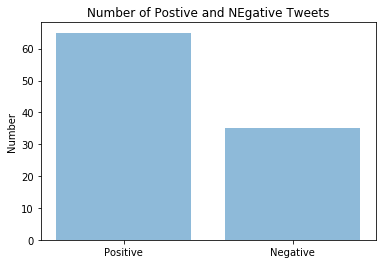

In [30]:
# Visualizing the results
import matplotlib.pyplot as plt
import numpy as np
objects = ['Positive','Negative']
y_pos = np.arange(len(objects))

plt.bar(y_pos,[positive,negative],alpha=0.5)
plt.xticks(y_pos,objects)
plt.ylabel('Number')
plt.title('Number of Postive and NEgative Tweets')

plt.show()